In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
(x_train, y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

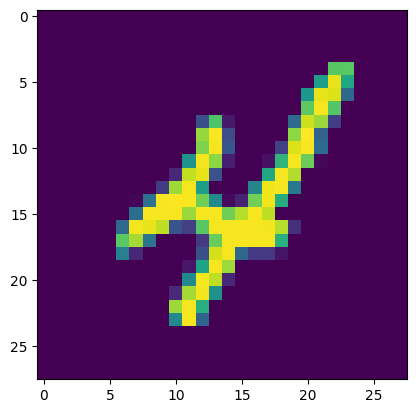

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[9])
plt.show()

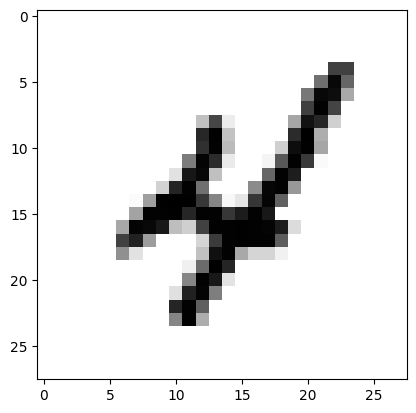

In [4]:
plt.imshow(x_train[9],cmap=plt.cm.binary)

In [5]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


In [6]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

C:\Users\abhis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.5682 - val_loss: 0.1831
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1598 - val_loss: 0.1364
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1069 - val_loss: 0.1122
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0785 - val_loss: 0.1050
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0590 - val_loss: 0.1023
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0478 - val_loss: 0.0985
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0383 - val_loss: 0.0942
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0290 - val_loss: 0.0948
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0219 - val_loss: 0.0940
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0181 - val_loss: 0.0988


In [8]:
model.save('my_model.h5')

In [9]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

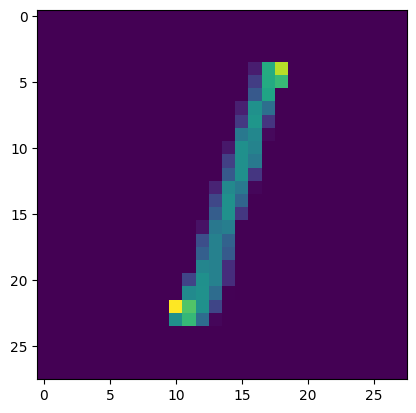

In [11]:
plt.imshow(x_test[2])

In [12]:
import gradio as gr 
import numpy as np
def sketch_recognition(img):
    x=model.predict(img.reshape(1,28,28)).argmax(axis=1)
    return x

In [13]:
gr.Interface(fn=sketch_recognition,inputs="sketchpad",outputs="text").launch(debug=True)

IMPORTANT: You are using gradio version 2.3.5, however version 4.29.0 is available, please upgrade.
--------
Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
